In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.insert(1, 'C:/Users/peter/Desktop/volatility-forecasting/midas')

from stats import dm_test

In [106]:
params = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH/PARAMS_NORM_FINAL.csv')
params_t = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH/PARAMS_STUD_FINAL.csv')

In [107]:
params.set_index(pd.to_datetime(params.iloc[:, 0]), inplace = True)
params = params.iloc[:, 1:]
params_t.set_index(pd.to_datetime(params_t.iloc[:, 0]), inplace = True)
params_t = params_t.iloc[:, 1:]

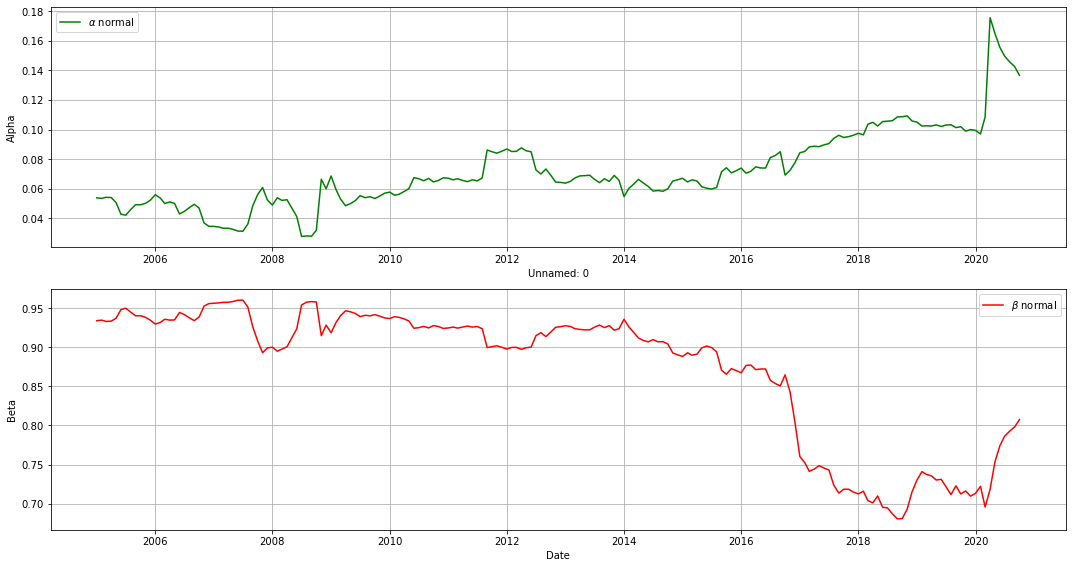

In [108]:
fig, ax = plt.subplots(2, 1, figsize = (15,8))
sns.lineplot(pd.to_datetime(params.index), params.Alpha, label = r'$\alpha$ normal', color = 'g', ax = ax[0])
ax[0].grid(True)
sns.lineplot(pd.to_datetime(params.index), params.Beta, label = r'$\beta$ normal', color = 'r', ax = ax[1])
ax[1].grid(True)
plt.legend(loc = 'best')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

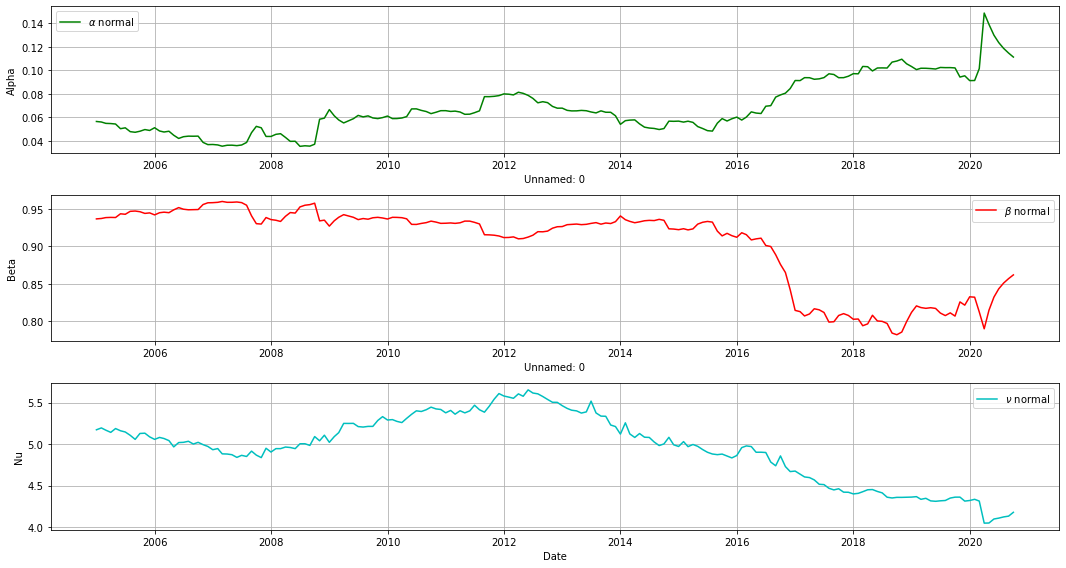

In [109]:
fig, ax = plt.subplots(3, 1, figsize = (15,8))
sns.lineplot(pd.to_datetime(params.index), params_t.Alpha, label = r'$\alpha$ normal', color = 'g', ax = ax[0])
ax[0].grid(True)
sns.lineplot(pd.to_datetime(params.index), params_t.Beta, label = r'$\beta$ normal', color = 'r', ax = ax[1])
ax[1].grid(True)
sns.lineplot(pd.to_datetime(params.index), params_t.Nu, label = r'$\nu$ normal', color = 'c', ax = ax[2])
ax[2].grid(True)
plt.legend(loc = 'best')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

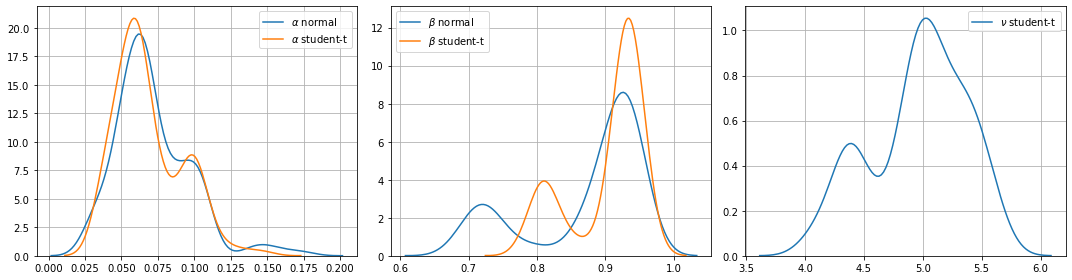

In [110]:
fig, ax = plt.subplots(1, 3, figsize = (15,4))

sns.kdeplot(params.Alpha, ax = ax[0], label = r'$\alpha$ normal')
sns.kdeplot(params_t.Alpha, ax = ax[0], label = r'$\alpha$ student-t')
ax[0].grid(0.2)

sns.kdeplot(params.Beta, ax = ax[1], label = r'$\beta$ normal')
sns.kdeplot(params_t.Beta, ax = ax[1], label = r'$\beta$ student-t')
ax[1].grid(0.2)

sns.kdeplot(params_t.Nu, ax = ax[2], label = r'$\nu$ student-t')
ax[2].grid(0.2)

plt.tight_layout()
plt.show()

In [7]:
actual = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/MONTHLY_VOLATILITY_CALC.csv')
actual = actual.set_index(actual.iloc[:, 0])
actual = actual.iloc[:, 1:]

In [8]:
daily_act = actual.iloc[:-1, :] / np.sqrt(22)
monthly_avg = daily_act.mean(axis = 1)

In [9]:
pred1 = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH/forecast_norm_dist.csv')
pred1 = pred1.T
pred1.columns = pred1.iloc[0, :].values
pred1 = pred1.iloc[1:, :]
pred1_avg = pred1.mean(axis = 1)

In [10]:
pred2 = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH/forecast_t_dist.csv')
pred2 = pred2.T
pred2.columns = pred2.iloc[0, :].values
pred2 = pred2.iloc[1:, :]
pred2_avg = pred2.mean(axis = 1)

## DM test with MSE criterion:

In [11]:
dm_test(monthly_avg.values, pred1_avg.values, pred2_avg.values, h = 1, degree = 0)

(2.5848142005183714, 0.010496756455495141)

## DM test with QLIKE criterion:

In [12]:
dm_test(monthly_avg.values, pred1_avg.values, pred2_avg.values, h = 1, degree = -2)

(-2.917818957162368, 0.003952378271464045)

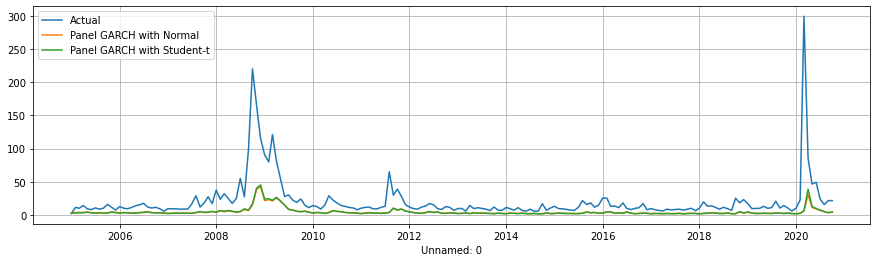

In [13]:
plt.figure(figsize = (15, 4))
sns.lineplot(pd.to_datetime(monthly_avg.index), monthly_avg, label = 'Actual')
sns.lineplot(pd.to_datetime(pred1_avg.index), pred1_avg, label = 'Panel GARCH with Normal')
sns.lineplot(pd.to_datetime(pred2_avg.index), pred2_avg, label = 'Panel GARCH with Student-t')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

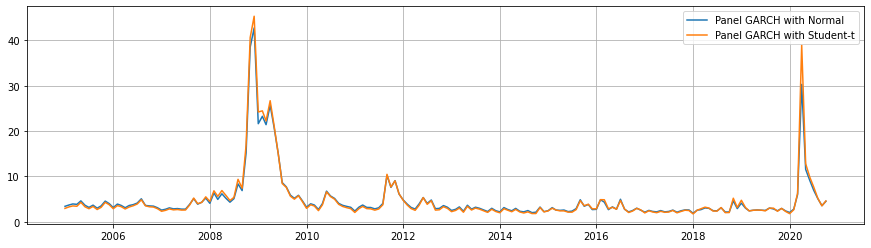

In [14]:
plt.figure(figsize = (15, 4))
sns.lineplot(pd.to_datetime(pred1_avg.index), pred1_avg, label = 'Panel GARCH with Normal')
sns.lineplot(pd.to_datetime(pred2_avg.index), pred2_avg, label = 'Panel GARCH with Student-t')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

## Panel GARCH-MIDAS

In [20]:
midas_pars = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH_MIDAS/Concated/params_midas.csv')
norm_pars = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH_MIDAS/Concated/params_norm.csv')
stud_pars = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH_MIDAS/Concated/params_stud.csv')

In [21]:
midas_pars.set_index(pd.to_datetime(midas_pars.iloc[:, 0]), inplace = True)
midas_pars = midas_pars.iloc[:, 1:]
norm_pars.set_index(pd.to_datetime(norm_pars.iloc[:, 0]), inplace = True)
norm_pars = norm_pars.iloc[:, 1:]
stud_pars.set_index(pd.to_datetime(stud_pars.iloc[:, 0]), inplace = True)
stud_pars = stud_pars.iloc[:, 1:]

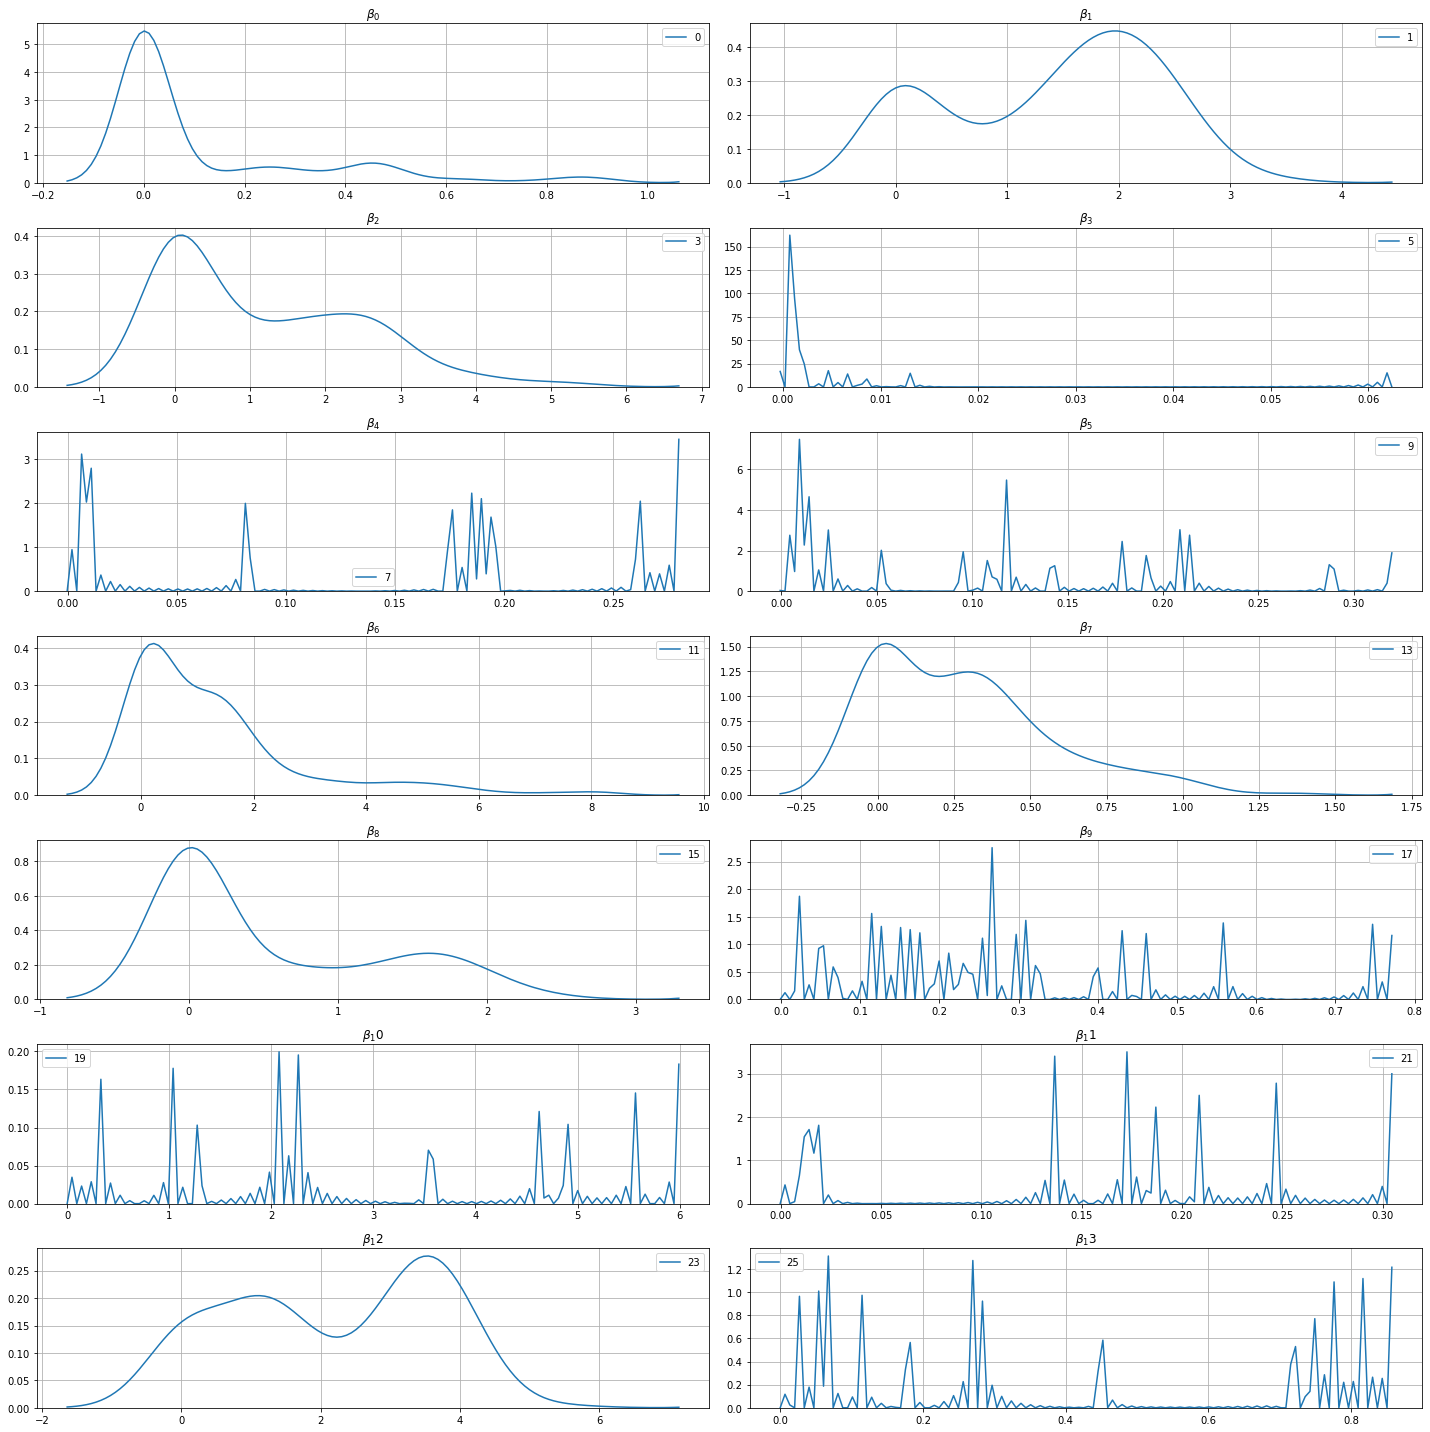

In [26]:
fig, ax = plt.subplots(7, 2, figsize = (20,20))


sns.kdeplot(midas_pars.iloc[:, 0], ax = ax[0][0])
ax[0][0].grid(0.2)
ax[0][0].set_title(r'$\beta_0$')

sns.kdeplot(midas_pars.iloc[:, 1], ax = ax[0][1])
ax[0][1].grid(0.2)
ax[0][1].set_title(r'$\beta_1$')

sns.kdeplot(midas_pars.iloc[:, 3], ax = ax[1][0])
ax[1][0].grid(0.2)
ax[1][0].set_title(r'$\beta_2$')

sns.kdeplot(midas_pars.iloc[:, 5], ax = ax[1][1])
ax[1][1].grid(0.2)
ax[1][1].set_title(r'$\beta_3$')

sns.kdeplot(midas_pars.iloc[:, 7], ax = ax[2][0])
ax[2][0].grid(0.2)
ax[2][0].set_title(r'$\beta_4$')

sns.kdeplot(midas_pars.iloc[:, 9], ax = ax[2][1])
ax[2][1].grid(0.2)
ax[2][1].set_title(r'$\beta_5$')

sns.kdeplot(midas_pars.iloc[:, 11], ax = ax[3][0])
ax[3][0].grid(0.2)
ax[3][0].set_title(r'$\beta_6$')

sns.kdeplot(midas_pars.iloc[:, 13], ax = ax[3][1])
ax[3][1].grid(0.2)
ax[3][1].set_title(r'$\beta_7$')

sns.kdeplot(midas_pars.iloc[:, 15], ax = ax[4][0])
ax[4][0].grid(0.2)
ax[4][0].set_title(r'$\beta_8$')

sns.kdeplot(midas_pars.iloc[:, 17], ax = ax[4][1])
ax[4][1].grid(0.2)
ax[4][1].set_title(r'$\beta_9$')

sns.kdeplot(midas_pars.iloc[:, 19], ax = ax[5][0])
ax[5][0].grid(0.2)
ax[5][0].set_title(r'$\beta_10$')

sns.kdeplot(midas_pars.iloc[:, 21], ax = ax[5][1])
ax[5][1].grid(0.2)
ax[5][1].set_title(r'$\beta_11$')

sns.kdeplot(midas_pars.iloc[:, 23], ax = ax[6][0])
ax[6][0].grid(0.2)
ax[6][0].set_title(r'$\beta_12$')

sns.kdeplot(midas_pars.iloc[:, 25], ax = ax[6][1])
ax[6][1].grid(0.2)
ax[6][1].set_title(r'$\beta_13$')

plt.tight_layout()
plt.show()

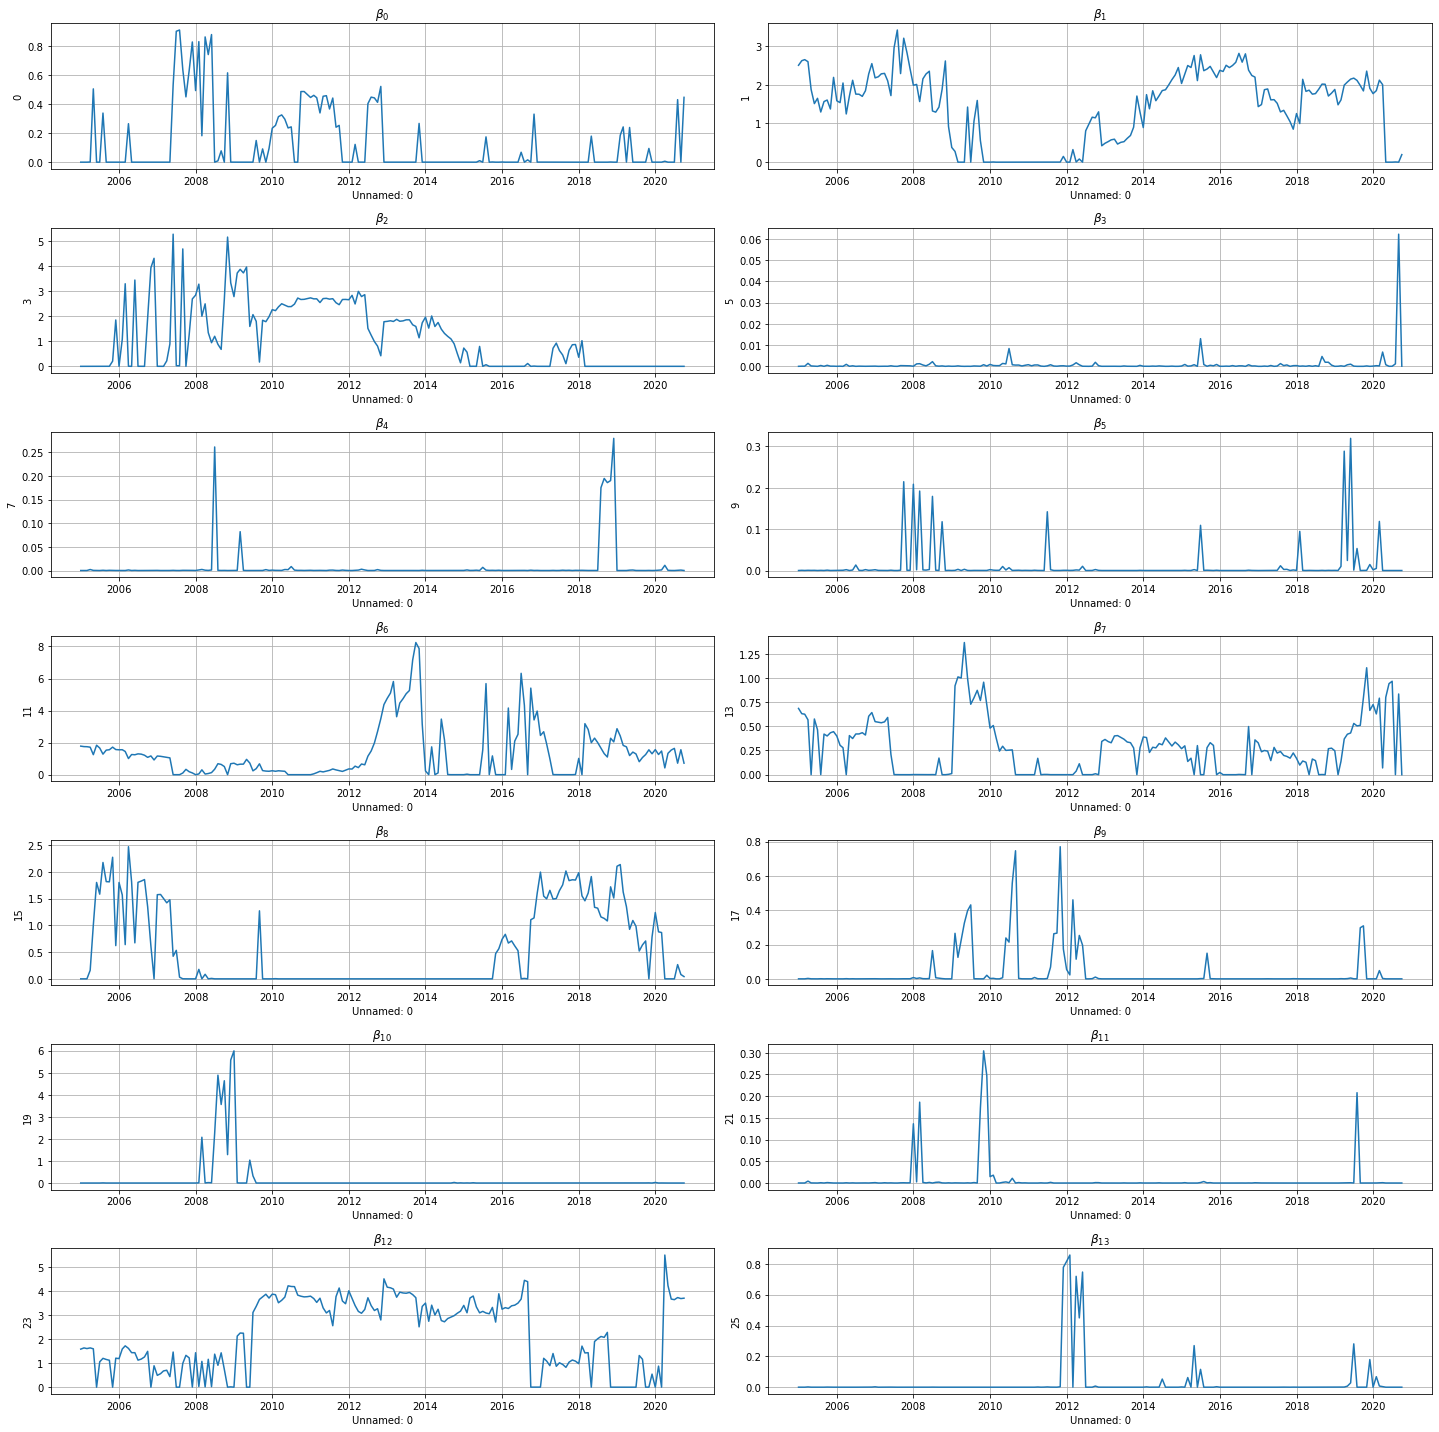

In [29]:
fig, ax = plt.subplots(7, 2, figsize = (20,20))


sns.lineplot(midas_pars.index, midas_pars.iloc[:, 0], ax = ax[0][0])
ax[0][0].grid(0.2)
ax[0][0].set_title(r'$\beta_0$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 1], ax = ax[0][1])
ax[0][1].grid(0.2)
ax[0][1].set_title(r'$\beta_1$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 3], ax = ax[1][0])
ax[1][0].grid(0.2)
ax[1][0].set_title(r'$\beta_2$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 5], ax = ax[1][1])
ax[1][1].grid(0.2)
ax[1][1].set_title(r'$\beta_3$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 7], ax = ax[2][0])
ax[2][0].grid(0.2)
ax[2][0].set_title(r'$\beta_4$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 9], ax = ax[2][1])
ax[2][1].grid(0.2)
ax[2][1].set_title(r'$\beta_5$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 11], ax = ax[3][0])
ax[3][0].grid(0.2)
ax[3][0].set_title(r'$\beta_6$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 13], ax = ax[3][1])
ax[3][1].grid(0.2)
ax[3][1].set_title(r'$\beta_7$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 15], ax = ax[4][0])
ax[4][0].grid(0.2)
ax[4][0].set_title(r'$\beta_8$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 17], ax = ax[4][1])
ax[4][1].grid(0.2)
ax[4][1].set_title(r'$\beta_9$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 19], ax = ax[5][0])
ax[5][0].grid(0.2)
ax[5][0].set_title(r'$\beta_{10}$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 21], ax = ax[5][1])
ax[5][1].grid(0.2)
ax[5][1].set_title(r'$\beta_{11}$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 23], ax = ax[6][0])
ax[6][0].grid(0.2)
ax[6][0].set_title(r'$\beta_{12}$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 25], ax = ax[6][1])
ax[6][1].grid(0.2)
ax[6][1].set_title(r'$\beta_{13}$')

plt.tight_layout()
plt.show()

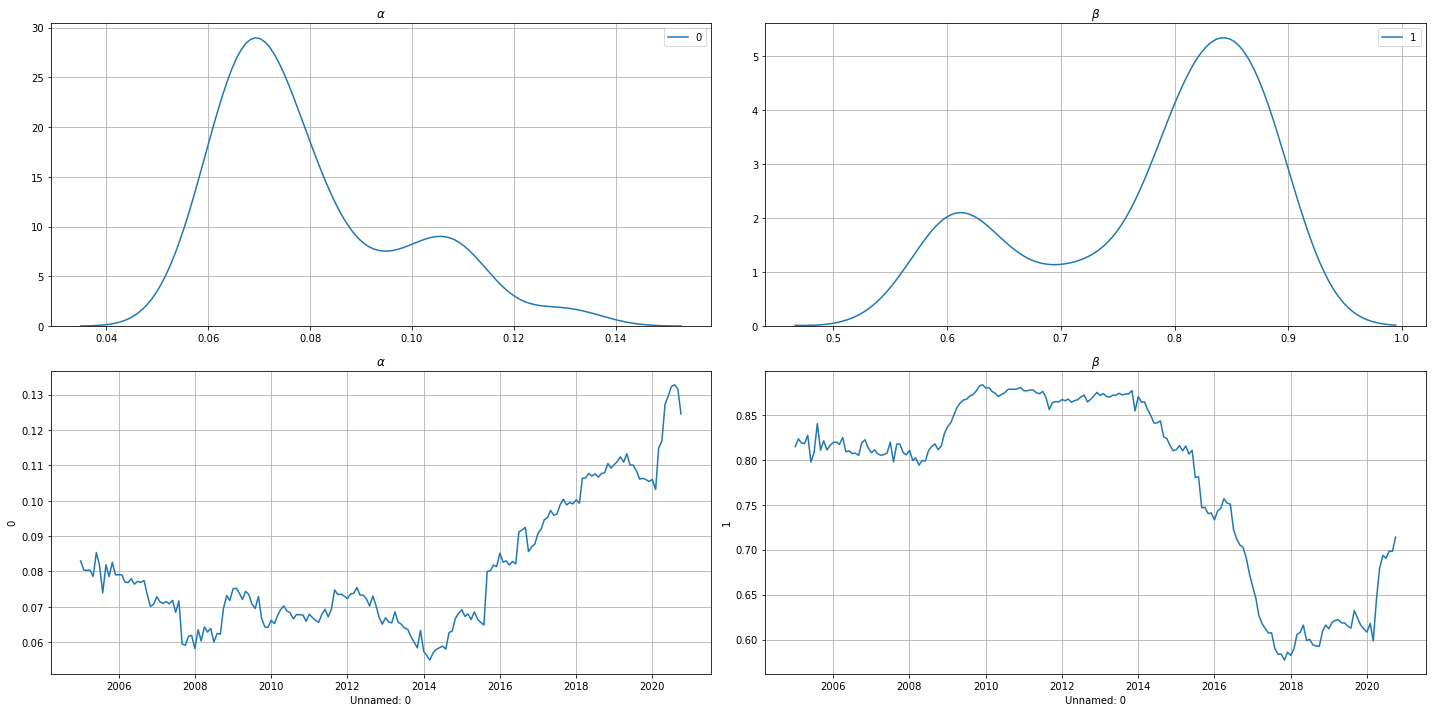

In [31]:
fig, ax = plt.subplots(2, 2, figsize = (20,10))


sns.kdeplot(norm_pars.iloc[:, 0], ax = ax[0][0])
ax[0][0].grid(0.2)
ax[0][0].set_title(r'$\alpha$')

sns.kdeplot(norm_pars.iloc[:, 1], ax = ax[0][1])
ax[0][1].grid(0.2)
ax[0][1].set_title(r'$\beta$')

sns.lineplot(norm_pars.index, norm_pars.iloc[:, 0], ax = ax[1][0])
ax[1][0].grid(0.2)
ax[1][0].set_title(r'$\alpha$')

sns.lineplot(norm_pars.index, norm_pars.iloc[:, 1], ax = ax[1][1])
ax[1][1].grid(0.2)
ax[1][1].set_title(r'$\beta$')

plt.tight_layout()
plt.show()

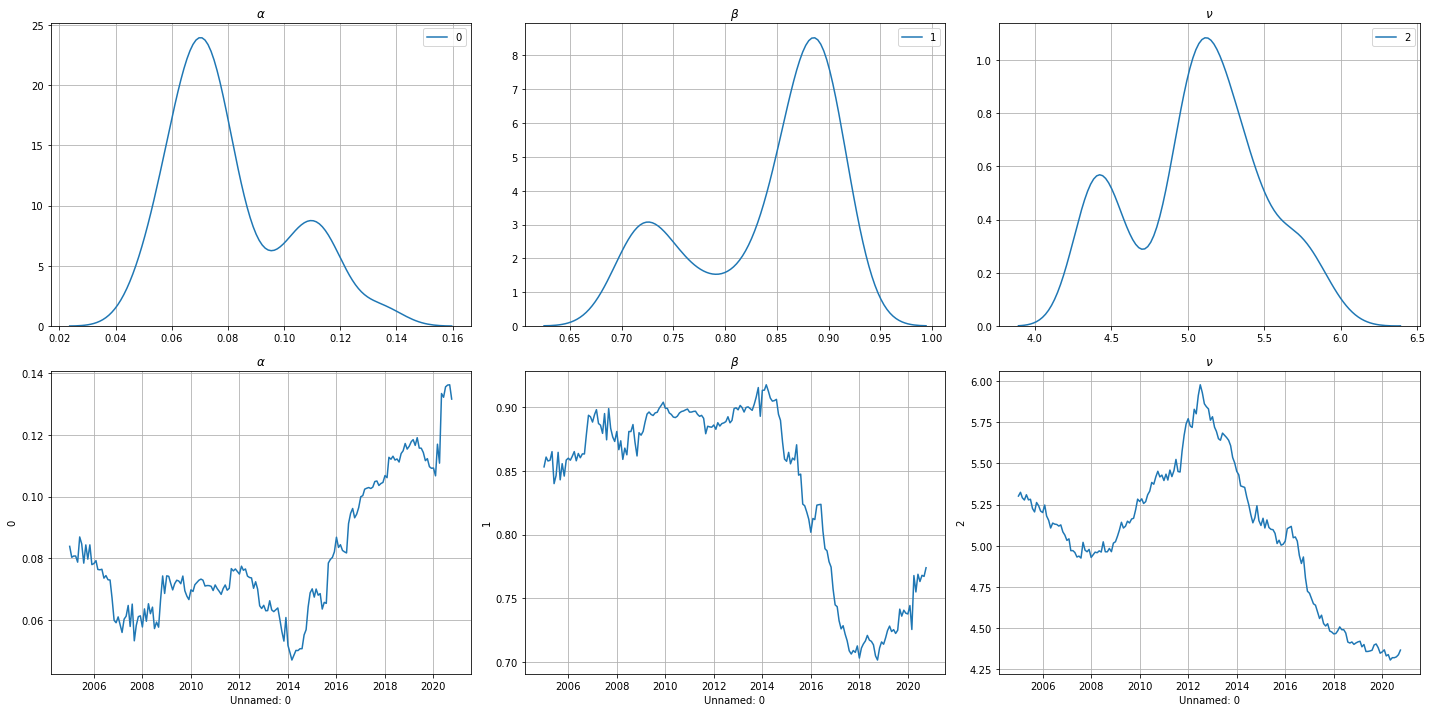

In [102]:
fig, ax = plt.subplots(2, 3, figsize = (20,10))


sns.kdeplot(stud_pars.iloc[:, 0], ax = ax[0][0])
ax[0][0].grid(0.2)
ax[0][0].set_title(r'$\alpha$')

sns.kdeplot(stud_pars.iloc[:, 1], ax = ax[0][1])
ax[0][1].grid(0.2)
ax[0][1].set_title(r'$\beta$')

sns.kdeplot(stud_pars.iloc[:, 2], ax = ax[0][2])
ax[0][2].grid(0.2)
ax[0][2].set_title(r'$\nu$')

sns.lineplot(stud_pars.index, stud_pars.iloc[:, 0], ax = ax[1][0])
ax[1][0].grid(0.2)
ax[1][0].set_title(r'$\alpha$')

sns.lineplot(stud_pars.index, stud_pars.iloc[:, 1], ax = ax[1][1])
ax[1][1].grid(0.2)
ax[1][1].set_title(r'$\beta$')

sns.lineplot(stud_pars.index, stud_pars.iloc[:, 2], ax = ax[1][2])
ax[1][2].grid(0.2)
ax[1][2].set_title(r'$\nu$')

plt.tight_layout()
plt.show()

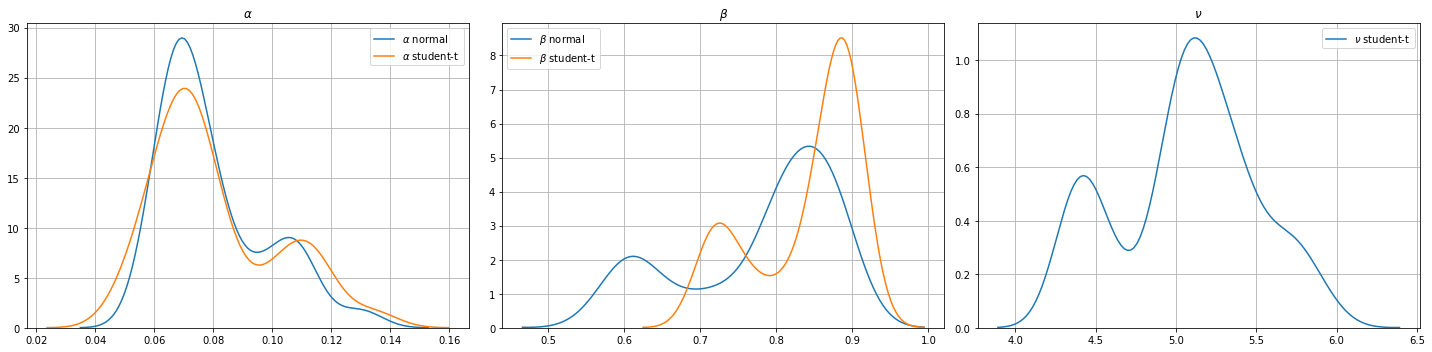

In [104]:
fig, ax = plt.subplots(1, 3, figsize = (20,5))

sns.kdeplot(norm_pars.iloc[:, 0], ax = ax[0], label = r'$\alpha$ normal')
sns.kdeplot(stud_pars.iloc[:, 0], ax = ax[0], label = r'$\alpha$ student-t')
ax[0].grid(0.2)
ax[0].set_title(r'$\alpha$')

sns.kdeplot(norm_pars.iloc[:, 1], ax = ax[1], label = r'$\beta$ normal')
sns.kdeplot(stud_pars.iloc[:, 1], ax = ax[1], label = r'$\beta$ student-t')
ax[1].grid(0.2)
ax[1].set_title(r'$\beta$')

sns.kdeplot(stud_pars.iloc[:, 2], ax = ax[2], label = r'$\nu$ student-t')
ax[2].grid(0.2)
ax[2].set_title(r'$\nu$')

plt.tight_layout()
plt.show()

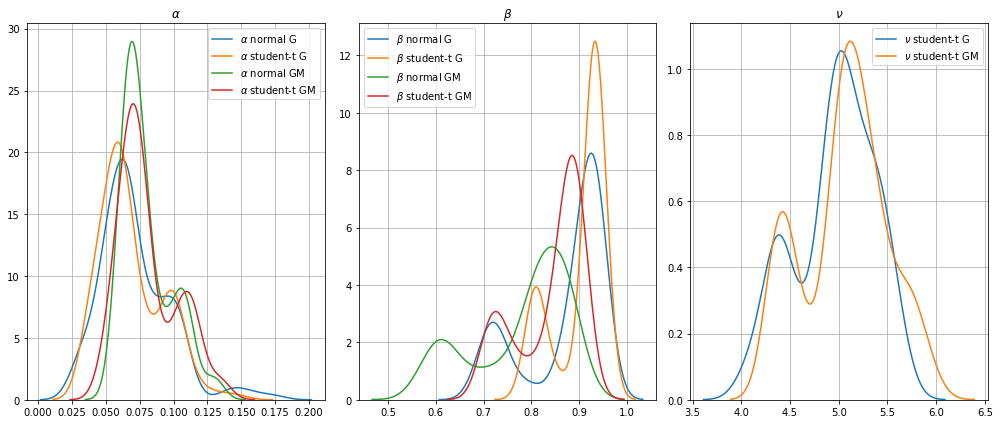

In [112]:
fig, ax = plt.subplots(1, 3, figsize = (14,6))

sns.kdeplot(params.Alpha, ax = ax[0], label = r'$\alpha$ normal G')
sns.kdeplot(params_t.Alpha, ax = ax[0], label = r'$\alpha$ student-t G')
sns.kdeplot(norm_pars.iloc[:, 0], ax = ax[0], label = r'$\alpha$ normal GM')
sns.kdeplot(stud_pars.iloc[:, 0], ax = ax[0], label = r'$\alpha$ student-t GM')
ax[0].grid(0.2)
ax[0].set_title(r'$\alpha$')

sns.kdeplot(params.Beta, ax = ax[1], label = r'$\beta$ normal G')
sns.kdeplot(params_t.Beta, ax = ax[1], label = r'$\beta$ student-t G')
sns.kdeplot(norm_pars.iloc[:, 1], ax = ax[1], label = r'$\beta$ normal GM')
sns.kdeplot(stud_pars.iloc[:, 1], ax = ax[1], label = r'$\beta$ student-t GM')
ax[1].grid(0.2)
ax[1].set_title(r'$\beta$')

sns.kdeplot(params_t.Nu, ax = ax[2], label = r'$\nu$ student-t G')
sns.kdeplot(stud_pars.iloc[:, 2], ax = ax[2], label = r'$\nu$ student-t GM')
ax[2].grid(0.2)
ax[2].set_title(r'$\nu$')

plt.tight_layout()
plt.show()

In [41]:
gm_norm = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH_MIDAS/Concated/forecast_norm.csv')
gm_stud = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH_MIDAS/Concated/forecast_stud.csv')

In [44]:
gm_norm.set_index(pd.to_datetime(gm_norm.iloc[:, 0]), inplace = True)
gm_norm = gm_norm.iloc[:, 1:]
gm_stud.set_index(pd.to_datetime(gm_stud.iloc[:, 0]), inplace = True)
gm_stud = gm_stud.iloc[:, 1:]

In [61]:
gm_norm_avg = gm_norm.mean(axis = 1)
gm_stud_avg = gm_stud.mean(axis = 1)

In [54]:
actual = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/MONTHLY_VOLATILITY_CALC.csv')
actual = actual.set_index(actual.iloc[:, 0])
actual = actual.iloc[:, 1:]
actual.pop('AMCR')

Unnamed: 0
2005-01     0.000000
2005-02     0.000000
2005-03     0.000000
2005-04     0.000000
2005-05     0.000000
             ...    
2020-07    36.358727
2020-08    39.977471
2020-09    65.923220
2020-10    33.613098
2020-11     0.000000
Name: AMCR, Length: 191, dtype: float64

In [55]:
daily_act = actual.iloc[:-1, :] / np.sqrt(22)
monthly_avg = daily_act.mean(axis = 1)

In [56]:
pred1 = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH/forecast_norm_dist.csv')
pred1 = pred1.T
pred1.columns = pred1.iloc[0, :].values
pred1 = pred1.iloc[1:, :]
pred1.pop('AMCR')
pred1_avg = pred1.mean(axis = 1)

In [57]:
pred2 = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH/forecast_t_dist.csv')
pred2 = pred2.T
pred2.columns = pred2.iloc[0, :].values
pred2 = pred2.iloc[1:, :]
pred2.pop('AMCR')
pred2_avg = pred2.mean(axis = 1)

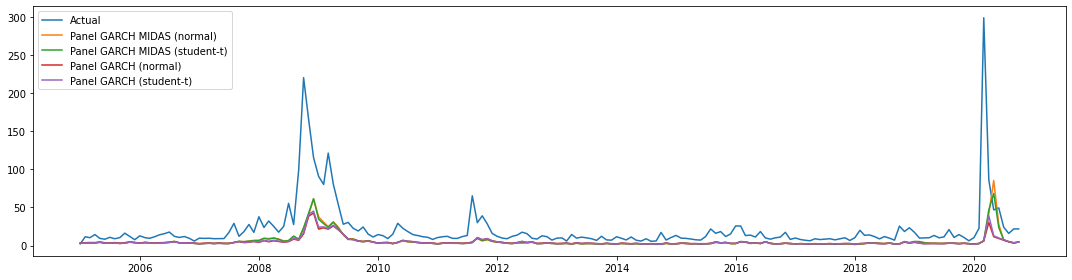

In [69]:
plt.figure(figsize = (15, 4))
plt.plot(gm_norm_avg.index, monthly_avg, label = 'Actual')
plt.plot(gm_norm_avg, label = 'Panel GARCH MIDAS (normal)')
plt.plot(gm_stud_avg, label = 'Panel GARCH MIDAS (student-t)')
plt.plot(gm_norm_avg.index, pred1_avg, label = 'Panel GARCH (normal)')
plt.plot(gm_norm_avg.index, pred2_avg, label = 'Panel GARCH (student-t)')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

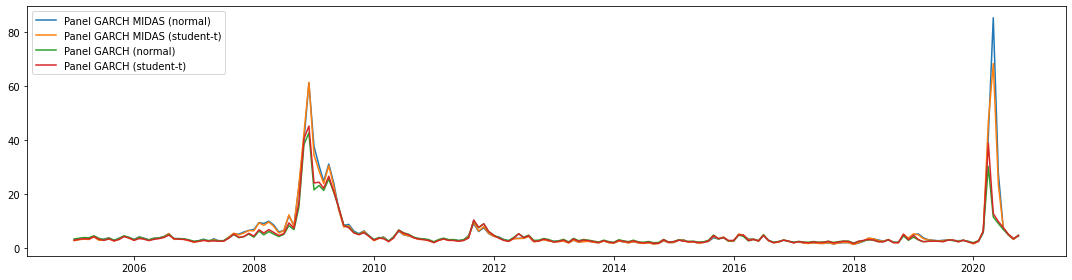

In [70]:
plt.figure(figsize = (15, 4))
plt.plot(gm_norm_avg, label = 'Panel GARCH MIDAS (normal)')
plt.plot(gm_stud_avg, label = 'Panel GARCH MIDAS (student-t)')
plt.plot(gm_norm_avg.index, pred1_avg, label = 'Panel GARCH (normal)')
plt.plot(gm_norm_avg.index, pred2_avg, label = 'Panel GARCH (student-t)')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Diebold-Mariano Test with MSE:

### Panel GARCH (normal) vs Panel GARCH (student-t):

In [77]:
dm_test(monthly_avg.values, pred1_avg.values, pred2_avg.values, h = 1, degree = 0)

(2.5850679266860364, 0.010489304236481074)

### Panel GARCH (normal) vs Panel GARCH-MIDAS (normal):

In [79]:
dm_test(monthly_avg.values, pred1_avg.values, gm_norm_avg.values, h = 1, degree = 0)

(2.741883798658866, 0.0066956852594998815)

### Panel GARCH (normal) vs Panel GARCH-MIDAS (student-t):

In [80]:
dm_test(monthly_avg.values, pred1_avg.values, gm_stud_avg.values, h = 1, degree = 0)

(2.91826902792437, 0.003946926797384688)

### Panel GARCH (student-t) vs Panel GARCH-MIDAS (normal):

In [81]:
dm_test(monthly_avg.values, pred2_avg.values, gm_norm_avg.values, h = 1, degree = 0)

(2.509048606266874, 0.01294628144658466)

### Panel GARCH (student-t) vs Panel GARCH-MIDAS (student-t):

In [82]:
dm_test(monthly_avg.values, pred2_avg.values, gm_stud_avg.values, h = 1, degree = 0)

(2.855052211065072, 0.004783744553528799)

### Panel GARCH-MIDAS (normal) vs Panel GARCH-MIDAS (student-t):

In [83]:
dm_test(monthly_avg.values, gm_norm_avg.values, gm_stud_avg.values, h = 1, degree = 0)

(0.8689659546853014, 0.3859678933912931)

# Diebold-Mariano Test with QLIKE:

### Panel GARCH (normal) vs Panel GARCH (student-t):

In [84]:
dm_test(monthly_avg.values, pred1_avg.values, pred2_avg.values, h = 1, degree = -2)

(-2.9245874035357753, 0.003871118658700336)

### Panel GARCH (normal) vs Panel GARCH-MIDAS (normal):

In [85]:
dm_test(monthly_avg.values, pred1_avg.values, gm_norm_avg.values, h = 1, degree = -2)

(0.5138340494627482, 0.6079682295353301)

### Panel GARCH (normal) vs Panel GARCH-MIDAS (student-t):

In [86]:
dm_test(monthly_avg.values, pred1_avg.values, gm_stud_avg.values, h = 1, degree = -2)

(-0.32235168538391795, 0.7475425727032754)

### Panel GARCH (student-t) vs Panel GARCH-MIDAS (normal):

In [87]:
dm_test(monthly_avg.values, pred2_avg.values, gm_norm_avg.values, h = 1, degree = -2)

(1.9169085937618673, 0.056757892168208826)

### Panel GARCH (student-t) vs Panel GARCH-MIDAS (student-t):

In [88]:
dm_test(monthly_avg.values, pred2_avg.values, gm_stud_avg.values, h = 1, degree = -2)

(1.2128505924091757, 0.22670070330095954)

### Panel GARCH-MIDAS (normal) vs Panel GARCH-MIDAS (student-t):

In [89]:
dm_test(monthly_avg.values, gm_norm_avg.values, gm_stud_avg.values, h = 1, degree = -2)

(-1.7639584460454936, 0.07935457353371728)

In [116]:
gm_stud.XOM

Unnamed: 0
2005-01-01     1.143159
2005-02-01     0.823415
2005-03-01     3.096261
2005-04-01     1.673992
2005-05-01     3.746236
                ...    
2020-06-01    13.340447
2020-07-01     5.983558
2020-08-01     5.840282
2020-09-01     3.241516
2020-10-01     4.050384
Name: XOM, Length: 190, dtype: float64

In [120]:
daily_act.XOM

Unnamed: 0
2005-01     0.797607
2005-02    12.860252
2005-03     9.832657
2005-04    18.543250
2005-05    10.757648
             ...    
2020-06    60.186643
2020-07    26.138586
2020-08    13.195256
2020-09    15.006826
2020-10    27.905661
Name: XOM, Length: 190, dtype: float64